In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

Оценка  = Количество баллов за работу*2/10

Автор: Миленькин Александр

In [3]:
df = pd.read_csv('data/people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


id  was_married  childrens     salary  sex   age     profession  \
0   0            1        4.0   45032.40    1  82.0       Engineer   
1   1            1        2.0  202004.64    1  32.0         Doctor   
2   2            1        6.0  213158.75    1  14.0  Entertainment   
3   3            0        1.0  185692.78    0  10.0         Lawyer   
4   4            1        9.0  132067.32    1  99.0         Artist   

      home_cost  drive_info  
0  1.003674e+07         NaN  
1  1.014051e+07         0.0  
2  1.043318e+07         NaN  
3  1.004299e+07         NaN  
4  1.021908e+07         NaN

In [4]:
#Найдем повторные данные
df[df.duplicated()]

id  was_married  childrens     salary  sex   age     profession  \
5500    0            1        4.0   45032.40    1  82.0       Engineer   
5501    1            1        2.0  202004.64    1  32.0         Doctor   
5502    2            1        6.0  213158.75    1  14.0  Entertainment   
5503    3            0        1.0  185692.78    0  10.0         Lawyer   
5504    4            1        9.0  132067.32    1  99.0         Artist   
...   ...          ...        ...        ...  ...   ...            ...   
5995  495            1        0.0   37023.38    1   3.0      Executive   
5996  496            1        3.0     999.66    0  20.0      Homemaker   
5997  497            1        0.0    2042.76    0  17.0     Healthcare   
5998  498            0        1.0  186560.45    0  10.0         Lawyer   
5999  499            1        3.0    1000.71    0  21.0      Homemaker   

         home_cost  drive_info  
5500  1.003674e+07         NaN  
5501  1.014051e+07         0.0  
5502  1.043318e+07         NaN  
5503  1.004299e+07         NaN  
5504  1.021908e+07         NaN  
...            ...         ...  
5995  1.007038e+07         1.0  
5996  1.009348e+07         1.0  
5997  1.016696e+07         0.0  
5998  1.025544e+07         NaN  
5999  1.027476e+07         NaN  

[500 rows x 9 columns]

In [5]:
#Удаляем повторные данные
df = df.drop_duplicates()

In [6]:
df

id  was_married  childrens     salary  sex   age     profession  \
0        0            1        4.0   45032.40    1  82.0       Engineer   
1        1            1        2.0  202004.64    1  32.0         Doctor   
2        2            1        6.0  213158.75    1  14.0  Entertainment   
3        3            0        1.0  185692.78    0  10.0         Lawyer   
4        4            1        9.0  132067.32    1  99.0         Artist   
...    ...          ...        ...        ...  ...   ...            ...   
5495  5495            1        1.0   12676.77    1   9.0      Marketing   
5496  5496            1        6.0  215570.69    1  13.0  Entertainment   
5497  5497            1        0.0   34734.29    1   3.0      Executive   
5498  5498            1        1.0   12667.06    1   9.0      Marketing   
5499  5499            0        2.0  201840.19    1  33.0         Doctor   

         home_cost  drive_info  
0     1.003674e+07         NaN  
1     1.014051e+07         0.0  
2     1.043318e+07         NaN  
3     1.004299e+07         NaN  
4     1.021908e+07         NaN  
...            ...         ...  
5495  1.027045e+07         0.0  
5496  1.032767e+07         1.0  
5497  1.010075e+07         NaN  
5498  1.011321e+07         1.0  
5499  1.022512e+07         NaN  

[5500 rows x 9 columns]

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5500 non-null   int64  
 1   was_married  5500 non-null   int64  
 2   childrens    5500 non-null   float64
 3   salary       5500 non-null   float64
 4   sex          5500 non-null   int64  
 5   age          5500 non-null   float64
 6   profession   5500 non-null   object 
 7   home_cost    5500 non-null   float64
 8   drive_info   2976 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 429.7+ KB


In [8]:
#Численные признаки: childrens, salary, id, age, home_cost; 
#Категориальные: profession; 
#Бинарные: was_married, sex, drive_info

In [9]:
#Для поиска выбросов построим гистограммы 

<AxesSubplot:ylabel='Frequency'>

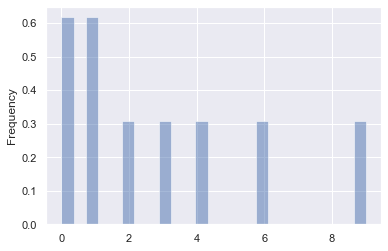

In [10]:
#Гистограмма для значений 'childrens'
df['childrens'].plot.hist(bins=25, alpha=0.5, density=True)

<AxesSubplot:ylabel='Frequency'>

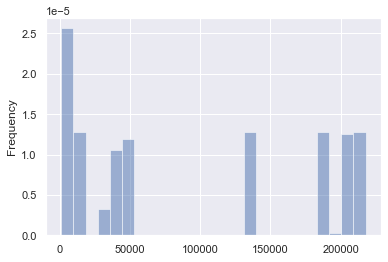

In [11]:
#Гистограмма для значений 'salary'
df['salary'].plot.hist(bins=25, alpha=0.5, density=True)

<AxesSubplot:ylabel='Frequency'>

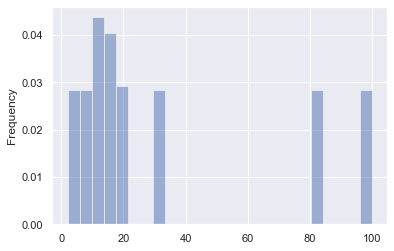

In [12]:
#Гистограмма для значений 'age'
df['age'].plot.hist(bins=25, alpha=0.5, density=True)

<AxesSubplot:ylabel='Frequency'>

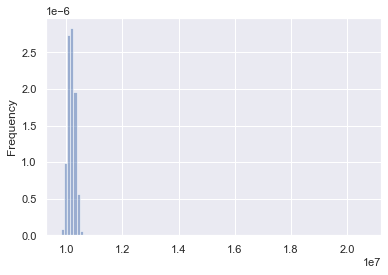

In [13]:
#Гистограмма для значений 'home_cost'
df['home_cost'].plot.hist(bins=100, alpha=0.5, density=True)

In [14]:
#Судя по гистограммам, выбросы есть только в признаке home_cost, их всего 9 штук, поэтому удалим их

In [15]:
#Получим индексы выбросов
rule1 = df['home_cost']>1.1e7
rule2 = df['home_cost']<0.985e7
tr = df[rule1 | rule2]
tr.index

Int64Index([173, 1140, 1779, 2070, 3307, 3380, 4014, 4365, 4727], dtype='int64')

In [16]:
#Удалим выбросы
df_without_outliers = df.drop(tr.index,axis=0)

<AxesSubplot:ylabel='Frequency'>

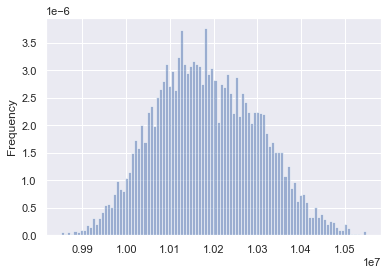

In [17]:
df_without_outliers['home_cost'].plot.hist(bins=100, alpha=0.5, density=True)
#Признак salаry имеет распределение, похожее на нормальное

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [18]:
#Понятно, что признаки id и drive_info бессмысленны, поэтому удалим их

In [19]:
df_clean = df_without_outliers.drop(['drive_info', 'id'], axis=1)

In [20]:
df_clean

was_married  childrens     salary  sex   age     profession  \
0               1        4.0   45032.40    1  82.0       Engineer   
1               1        2.0  202004.64    1  32.0         Doctor   
2               1        6.0  213158.75    1  14.0  Entertainment   
3               0        1.0  185692.78    0  10.0         Lawyer   
4               1        9.0  132067.32    1  99.0         Artist   
...           ...        ...        ...  ...   ...            ...   
5495            1        1.0   12676.77    1   9.0      Marketing   
5496            1        6.0  215570.69    1  13.0  Entertainment   
5497            1        0.0   34734.29    1   3.0      Executive   
5498            1        1.0   12667.06    1   9.0      Marketing   
5499            0        2.0  201840.19    1  33.0         Doctor   

         home_cost  
0     1.003674e+07  
1     1.014051e+07  
2     1.043318e+07  
3     1.004299e+07  
4     1.021908e+07  
...            ...  
5495  1.027045e+07  
5496  1.032767e+07  
5497  1.010075e+07  
5498  1.011321e+07  
5499  1.022512e+07  

[5491 rows x 7 columns]

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признками



In [21]:
#Построим матрицу корреляции
corr_matrix = df_clean.corr()
corr_matrix

was_married  childrens    salary       sex       age  home_cost
was_married     1.000000   0.242873 -0.500144  0.338104  0.200798  -0.342455
childrens       0.242873   1.000000  0.393691  0.386080  0.742385   0.284430
salary         -0.500144   0.393691  1.000000  0.244657  0.075623   0.710077
sex             0.338104   0.386080  0.244657  1.000000  0.340387   0.179874
age             0.200798   0.742385  0.075623  0.340387  1.000000   0.054570
home_cost      -0.342455   0.284430  0.710077  0.179874  0.054570   1.000000

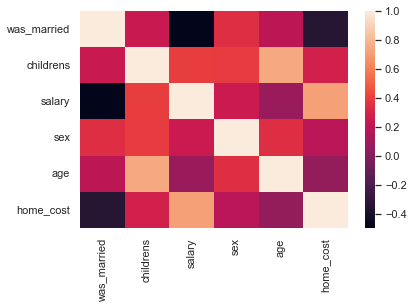

In [22]:
#Визуализируем матрицу корреляции
ax = sns.heatmap(corr_matrix)
#Довольно лигично, что есть связь между age-childrens и salary-home_cost  

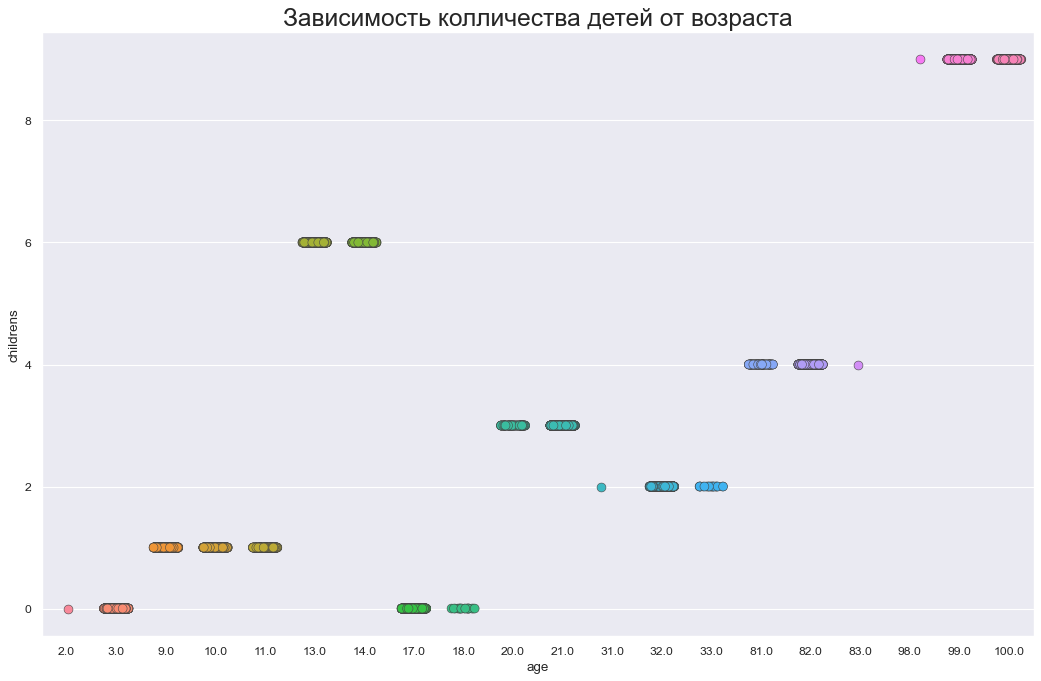

In [23]:
#График зависимости 'childrens' от 'age'
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_clean['age'], df_clean['childrens'], jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.title('Зависимость колличества детей от возраста', fontsize=22)
plt.show()

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [24]:
#Выберем признаки, которые нуждаются в нормировке (это численные признаки)
features = ['childrens', 'salary', 'age', 'home_cost']

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
df_clean

was_married  childrens     salary  sex   age     profession  \
0               1        4.0   45032.40    1  82.0       Engineer   
1               1        2.0  202004.64    1  32.0         Doctor   
2               1        6.0  213158.75    1  14.0  Entertainment   
3               0        1.0  185692.78    0  10.0         Lawyer   
4               1        9.0  132067.32    1  99.0         Artist   
...           ...        ...        ...  ...   ...            ...   
5495            1        1.0   12676.77    1   9.0      Marketing   
5496            1        6.0  215570.69    1  13.0  Entertainment   
5497            1        0.0   34734.29    1   3.0      Executive   
5498            1        1.0   12667.06    1   9.0      Marketing   
5499            0        2.0  201840.19    1  33.0         Doctor   

         home_cost  
0     1.003674e+07  
1     1.014051e+07  
2     1.043318e+07  
3     1.004299e+07  
4     1.021908e+07  
...            ...  
5495  1.027045e+07  
5496  1.032767e+07  
5497  1.010075e+07  
5498  1.011321e+07  
5499  1.022512e+07  

[5491 rows x 7 columns]

In [27]:
#Нормализуем данные
#Применив все три вида стандартизации я пришел к выводу, что RobustScaler в этой задаче подходит лучше всего
rs = RobustScaler()
normal_data = df_clean
normal_data[features] = rs.fit_transform(df_clean[features])
normal_data[features]

childrens    salary       age  home_cost
0      0.666667 -0.001207  2.954545  -0.812893
1      0.000000  0.901602  0.681818  -0.213667
2      1.333333  0.965754 -0.136364   1.476366
3     -0.333333  0.807786 -0.318182  -0.776853
4      2.333333  0.499365  3.727273   0.240031
...         ...       ...       ...        ...
5495  -0.333333 -0.187297 -0.363636   0.536649
5496   1.333333  0.979626 -0.181818   0.867099
5497  -0.666667 -0.060436 -0.636364  -0.443276
5498  -0.333333 -0.187353 -0.363636  -0.371354
5499   0.000000  0.900656  0.727273   0.274925

[5491 rows x 4 columns]

In [28]:
#Признаки, которые будем использовать для кластеризации
train_features = features + ['was_married', 'sex']

In [29]:
train_features

['childrens', 'salary', 'age', 'home_cost', 'was_married', 'sex']

In [30]:
normal_data[train_features]

childrens    salary       age  home_cost  was_married  sex
0      0.666667 -0.001207  2.954545  -0.812893            1    1
1      0.000000  0.901602  0.681818  -0.213667            1    1
2      1.333333  0.965754 -0.136364   1.476366            1    1
3     -0.333333  0.807786 -0.318182  -0.776853            0    0
4      2.333333  0.499365  3.727273   0.240031            1    1
...         ...       ...       ...        ...          ...  ...
5495  -0.333333 -0.187297 -0.363636   0.536649            1    1
5496   1.333333  0.979626 -0.181818   0.867099            1    1
5497  -0.666667 -0.060436 -0.636364  -0.443276            1    1
5498  -0.333333 -0.187353 -0.363636  -0.371354            1    1
5499   0.000000  0.900656  0.727273   0.274925            0    1

[5491 rows x 6 columns]

In [31]:
#Переменную 'profession' используем позже для проверки кластеров
y = df_clean['profession']

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

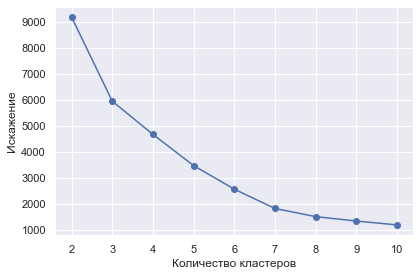

In [34]:
#Применим правило локтя
from sklearn.cluster import KMeans

distortions = []
X = normal_data[train_features].values
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=20, 
                max_iter=500, 
                random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

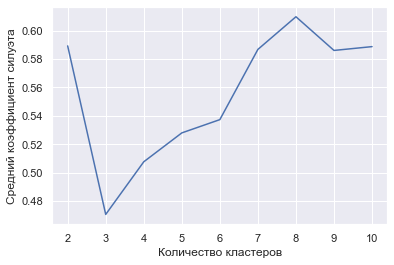

In [36]:
#Для надежности используем еще и коэфиициент силуэта
from sklearn.metrics import silhouette_samples
silhouette_avg = []
X = normal_data[train_features].values
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=20, 
                max_iter=500,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    
    silhouette_avg.append(np.mean(silhouette_samples(X, y_km, metric='euclidean')))

plt.plot(range(2, 11), silhouette_avg)
plt.ylabel('Средний коэффициент силуэта')
plt.xlabel("Количество кластеров")
plt.show

In [37]:
#Получется, что нужное нам колличество кластеров равно 8

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

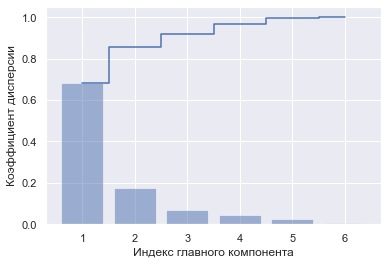

In [38]:
#Построим график объясненной дисперсии для алгоритма PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(normal_data[train_features])

plt.bar(range(1, 7), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 7), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Коэффициент дисперсии')
plt.xlabel('Индекс главного компонента')

plt.show()

In [39]:
#Используем PCA для уменьшения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normal_data[train_features])

# Нарисовать полученные кластеры (10 баллов)

In [40]:
#Применяем алгоритм KMeans с 8 кластерами
n_clusters = 8
km = KMeans(n_clusters=n_clusters,
            n_init=20,
            init='k-means++',
            max_iter=100,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(normal_data[train_features].values)

In [41]:
#Найдем самые частые значения 'profession' в каждом кластере, запишем список этих меток в labels
from scipy.stats import mode
labels = []
for i in range(n_clusters):
    labels.append(mode(y[y_km == i])[0][0])
labels

['Engineer',
 'Executive',
 'Entertainment',
 'Artist',
 'Lawyer',
 'Homemaker',
 'Doctor',
 'Healthcare']

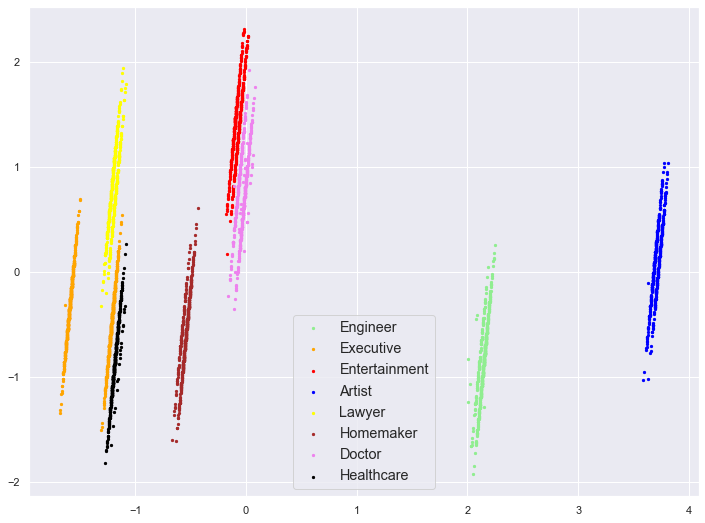

In [42]:
#Нарисуем полученные кластеры вместе со значениями 'profession'
colours = ['lightgreen', 'orange', 'red', 'blue', 'yellow', 'brown', 'violet', 'black', 'lightblue']
X = X_pca
plt.figure(figsize=(12,9))
for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0],
                X[y_km == i, 1],
                c=colours[i],
                cmap ='Set3', s=5,
                label= labels[i])


plt.legend(fontsize='large')
plt.show()

In [43]:
#Проверим, какие значения 'profession' содержатся в наших кластерах
for i in range(n_clusters):
    print(y[y_km == i].value_counts(), '\n')

Engineer    610
Name: profession, dtype: int64 

Marketing    609
Executive    609
Name: profession, dtype: int64 

Entertainment    611
Name: profession, dtype: int64 

Artist    611
Name: profession, dtype: int64 

Lawyer    611
Name: profession, dtype: int64 

Homemaker    609
Name: profession, dtype: int64 

Doctor    611
Name: profession, dtype: int64 

Healthcare    610
Name: profession, dtype: int64 



In [44]:
#K-means не смог отделить только 'Marketing' и 'Executive', остальные кластеры соответствуют своим меткам labels

In [47]:
#Посчитаем f-меру для получившейся кластеризации, используя значения столбца 'profession'

In [48]:
#Закодируем значения столбца 'profession' и добавим в labels 'Marketing'
class_mapping = {label: idx for idx, label in enumerate(labels+['Marketing'])}
y_cod = y.map(class_mapping).values

In [49]:
#Значение f-меры
from sklearn.metrics import f1_score
f1_score(y_cod, y_km, average='weighted')

0.8521216536150064

In [50]:
#Попробуем решить эту задачу методом DBSCAN

In [51]:
#Для DBSCAN в этой задаче лучше использовать StandarScaler, так графики получаются нагляднее
ss = StandardScaler()
normal_data1 = df_clean
normal_data1[features] = ss.fit_transform(df_clean[features])
normal_data1[features]

childrens    salary       age  home_cost
0      0.389586 -0.556339  1.537018  -1.238207
1     -0.312948  1.286198  0.003268  -0.364587
2      1.092121  1.417124 -0.548882   2.099334
3     -0.664216  1.094729 -0.671582  -1.185664
4      2.145922  0.465275  2.058492   0.296864
...         ...       ...       ...        ...
5495  -0.664216 -0.936129 -0.702257   0.729308
5496   1.092121  1.445436 -0.579557   1.211075
5497  -1.015483 -0.677218 -0.886307  -0.699337
5498  -0.664216 -0.936243 -0.702257  -0.594482
5499  -0.312948  1.284267  0.033943   0.347736

[5491 rows x 4 columns]

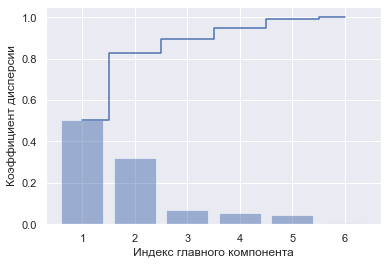

In [52]:
#Построим график объясненной дисперсии
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(normal_data1[train_features])

plt.bar(range(1, 7), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 7), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Коэффициент дисперсии')
plt.xlabel('Индекс главного компонента')

plt.show()

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normal_data1[train_features])

In [55]:
#Применяем алгоритм DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, metric='euclidean', n_jobs=-1).fit(normal_data1[train_features])
y_db = db.labels_
set(y_db)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [56]:
#Найдем самые частые значения 'profession' в каждом кластере, запишем список этих меток в labels1
labels1 = []
for i in range(len(set(y_db))-1):
    labels1.append(mode(y[y_db == i])[0][0])
labels1

['Engineer',
 'Doctor',
 'Entertainment',
 'Artist',
 'Homemaker',
 'Marketing',
 'Lawyer',
 'Healthcare',
 'Executive',
 'Doctor']

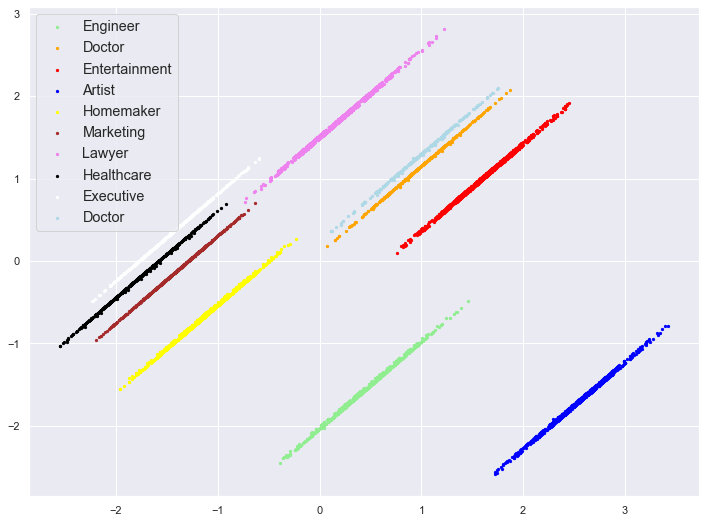

In [57]:
#Нарисуем полученные кластеры вместе со значениями 'profession'
c = ['lightgreen', 'orange', 'red', 'blue', 'yellow', 'brown', 'violet', 'black', 'white', 'lightblue']
X = X_pca
plt.figure(figsize=(12,9))
for i in range(len(set(y_db))-1):
    plt.scatter(X[y_db == i, 0],
                X[y_db == i, 1],
                c=c[i],
                cmap ='Set3', s=5,
                label= labels1[i])


plt.legend(fontsize='large')
plt.show()

In [58]:
#Проверим, какие значения 'profession' содержатся в наших кластерах
for i in range(len(set(y_db))-1):
    print(y[y_db == i].value_counts(), '\n')

Engineer    603
Name: profession, dtype: int64 

Doctor    349
Name: profession, dtype: int64 

Entertainment    610
Name: profession, dtype: int64 

Artist    608
Name: profession, dtype: int64 

Homemaker    604
Name: profession, dtype: int64 

Marketing    603
Name: profession, dtype: int64 

Lawyer    609
Name: profession, dtype: int64 

Healthcare    607
Name: profession, dtype: int64 

Executive    604
Name: profession, dtype: int64 

Doctor    258
Name: profession, dtype: int64 



In [59]:
#DBSCAN правильно нашел все кластеры, но кластеров с меткой 'Doctor' оказалось два. Я пытался устранить это изменением параметра eps, 
#но это приводило к слиянию кластеров 'Marketing' и 'Executive'

In [60]:
#Посчитаем f-меру для получившейся кластеризации

In [61]:
#Закодируем значения столбца 'profession'
class_mapping = {label: idx for idx, label in enumerate(labels1)}
y_cod1 = y.map(class_mapping).values

In [62]:
#Значение f-меры
f1_score(y_cod1, y_db, average='weighted')

0.9518736340707952

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**